In [ ]:
# Import necessary libraries
import torch
from transformers import AutoTokenizer, AutoModel, GPT2LMHeadModel, GPT2Tokenizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Check if GPU is available and being used 
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')


Using device: cuda


## Part 1: Sentence Embeddings and Cosine Similarity

In this part, we will use a pre-trained model to generate sentence embeddings and calculate the similarity between sentences.

## Loading the Model and Tokenizer
We will use the "BAAI/bge-small-en-v1.5" model from Hugging Face. This model provides sentence embeddings which we will use to compute cosine similarity.


In [ ]:
# Load the tokenizer and model
embedding_model_name = "BAAI/bge-small-en-v1.5"
tokenizer = AutoTokenizer.from_pretrained(embedding_model_name)
model = AutoModel.from_pretrained(embedding_model_name).to(device)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

### Function to Generate Sentence Embeddings
We will create a function that takes a sentence as input and returns its embedding.


In [ ]:
def get_sentence_embedding(sentence, tokenizer, model, device):
    # Tokenize the input sentence
    inputs = tokenizer(sentence, return_tensors='pt', truncation=True, padding=True)

    # Move the inputs to the device (GPU/CPU)
    inputs = {key: value.to(device) for key, value in inputs.items()}

    # Get the model outputs
    with torch.no_grad():
        outputs = model(**inputs)

    # Return the last hidden state (embedding) of the [CLS] token
    # For simplicity, we'll use the mean of the token embeddings as the sentence embedding
    embeddings = outputs.last_hidden_state.mean(dim=1)
    return embeddings.cpu().numpy()

# Example sentences
sentence1 = "I love studying natural language processing."
sentence2 = "NLP is fascinating and has many applications."

# Get embeddings for the sentences
embedding1 = get_sentence_embedding(sentence1, tokenizer, model, device)
embedding2 = get_sentence_embedding(sentence2, tokenizer, model, device)

print("Embedding for Sentence 1:", embedding1)
print("Embedding for Sentence 2:", embedding2)

Embedding for Sentence 1: [[-8.52574855e-02  1.27422005e-01  8.34514052e-02 -1.59170657e-01
   2.49064341e-01 -3.32563132e-01  9.72178340e-01  3.43544632e-01
   1.62495345e-01 -6.50292635e-01 -6.14134371e-01 -3.16616118e-01
   3.00875634e-01  2.91429251e-01  5.34429289e-02  5.57896569e-02
   8.51196125e-02 -1.80783346e-01 -5.61289251e-01 -6.09828644e-02
   8.67350176e-02 -8.21132138e-02  1.85914248e-01 -3.17274988e-01
  -4.27488178e-01  5.36933780e-01 -1.96135476e-01 -8.78783226e-01
  -2.13509910e-02 -1.50951219e+00  5.22190630e-02  1.85622320e-01
   7.49216855e-01 -2.44654208e-01 -6.17473185e-01  1.39048949e-01
  -5.35303473e-01  2.89042175e-01 -2.95890480e-01  7.24077076e-02
   2.83549100e-01 -4.37867522e-01  2.35186890e-01 -5.12986742e-02
   4.72016603e-01 -7.28961647e-01 -2.79699177e-01 -2.26298168e-01
  -1.01550184e-01 -1.14964992e-01 -4.53109533e-01 -3.49083066e-01
   2.11828053e-02  3.35600972e-01 -4.49939556e-02  7.40316510e-01
   8.71070147e-01  2.46966094e-01  3.06385875e-01 

### Calculating Cosine Similarity
Now that we have the embeddings, we can calculate the cosine similarity between the two sentences.


In [ ]:
# Calculate cosine similarity
similarity = cosine_similarity(embedding1, embedding2)
print(f"Cosine Similarity between Sentence 1 and Sentence 2: {similarity[0][0]}")

Cosine Similarity between Sentence 1 and Sentence 2: 0.7861980199813843


### Exercise
Try calculating the cosine similarity for different pairs of sentences. Here are a few examples to get you started:
- "The weather is nice today." and "It's sunny outside."
- "I enjoy reading books." and "I like to read novels in my free time."


## Part 2: Text Completion with GPT-2

In this part, we will use a pre-trained GPT-2 model to generate text completions.

### Loading the GPT-2 Model and Tokenizer
We will use the small version of GPT-2 for this exercise.

In [ ]:
# Load the GPT-2 tokenizer and model
gpt2_model_name = "gpt2"
gpt2_tokenizer = GPT2Tokenizer.from_pretrained(gpt2_model_name)
gpt2_model = GPT2LMHeadModel.from_pretrained(gpt2_model_name).to(device)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

### Exercise: Text Completion with GPT-2 and Temperature

Let's generate text completions using GPT-2 and experiment with different temperature settings.

1. Test the function with different prompts and temperature values. You can change the length of the generated text using the max_length parameter.

Hint: The `temperature` parameter controls the randomness of the predictions by scaling the logits before applying softmax. Lower values (closer to 0) make the model more deterministic, while higher values increase randomness.



In [ ]:
# Set the padding token
gpt2_tokenizer.pad_token = gpt2_tokenizer.eos_token

def generate_text(prompt, tokenizer, model, device, max_length=50, temperature=1.0):
    """
    Generate text completions using a pre-trained GPT-2 model.

    Parameters:
    - prompt (str): The input text prompt.
    - tokenizer (AutoTokenizer): The tokenizer for the GPT-2 model.
    - model (GPT2LMHeadModel): The pre-trained GPT-2 model.
    - device (str): The device to run the model on ('cuda' or 'cpu').
    - max_length (int): The maximum length of the generated text.
    - temperature (float): The temperature for text generation. Controls the randomness.

    Returns:
    - str: The generated text.
    """
    # Tokenize the input prompt with attention mask
    inputs = tokenizer(prompt, return_tensors='pt', padding=True, truncation=True).to(device)

    # Generate text completions
    with torch.no_grad():
        outputs = model.generate(
            inputs.input_ids,
            attention_mask=inputs.attention_mask,
            max_length=max_length,
            temperature=temperature,
            do_sample=True,  # Enable sampling to use temperature
            pad_token_id=tokenizer.eos_token_id,  # Set pad_token_id to eos_token_id to suppress the warning
            num_return_sequences=1
        )

    # Decode the generated text
    generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return generated_text

# Example prompt
prompt = "Once upon a time in a land far, far away"

# Generate text with different temperature settings
temperatures = [0.7, 1.0, 1.5]

for temp in temperatures:
    print(f"\nGenerated Text with Temperature {temp}:")
    print('-'*50)
    generated_text = generate_text(prompt, gpt2_tokenizer, gpt2_model, device, temperature=temp)
    print(generated_text)



Generated Text with Temperature 0.7:
--------------------------------------------------
Once upon a time in a land far, far away, from the city of London, there was a great stone wall, a huge, round stone wall. And the wall was to the south of the wall, and in front of that wall was

Generated Text with Temperature 1.0:
--------------------------------------------------
Once upon a time in a land far, far away. A land is an unknown past. Only your parents will tell you where they were, though. The land will tell you when they died, and you will recall your mother's fate.


Generated Text with Temperature 1.5:
--------------------------------------------------
Once upon a time in a land far, far away with no boundaries or boundaries not far removed from the state? Then come you all who dwell upon the earth with faith and who hold all you must need to understand each other's heartiness and desire


### Exercise
Try generating text completions with different prompts. Here are a few examples to get you started:
- "In the future, AI will"
- "The quick brown fox"
- "Deep learning techniques are"

Feel free to experiment with the `max_length` parameter to control the length of the generated text.


### Exercise: Visualizing Embeddings with PCA

Let's visualize the sentence embeddings using PCA. We will reduce the dimensionality of the embeddings to 2D and plot them.

1. Generate embeddings for the following sentences:
   - "The cat sat on the mat."
   - "Dogs are playing in the park."
   - "The weather is sunny and bright."
   - "I enjoy reading books."
   - "Artificial intelligence is transforming the world."

2. Use PCA to reduce the dimensionality to 2D.
3. Plot the 2D embeddings using a scatter plot.

Hint: Use `sklearn.decomposition.PCA` for dimensionality reduction and `matplotlib.pyplot` for plotting.


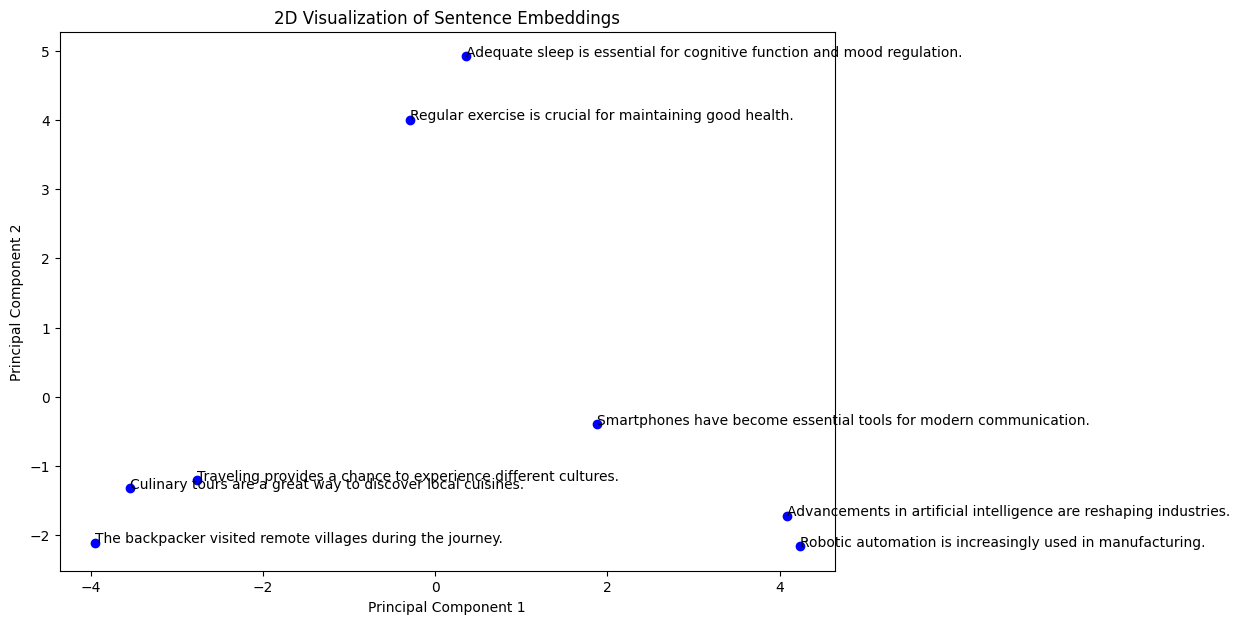

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

sentences = [
    "Traveling provides a chance to experience different cultures.",
    "The backpacker visited remote villages during the journey.",
    "Culinary tours are a great way to discover local cuisines.",
    "Advancements in artificial intelligence are reshaping industries.",
    "Robotic automation is increasingly used in manufacturing.",
    "Smartphones have become essential tools for modern communication.",
    "Regular exercise is crucial for maintaining good health.",
    "Adequate sleep is essential for cognitive function and mood regulation.",
]

# Generate embeddings for the sentences
embeddings = np.vstack([get_sentence_embedding(sentence, tokenizer, model, device) for sentence in sentences])

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Plot the embeddings
plt.figure(figsize=(10, 7))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], color='blue')

# Annotate the points with sentences
for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Visualization of Sentence Embeddings')
plt.show()


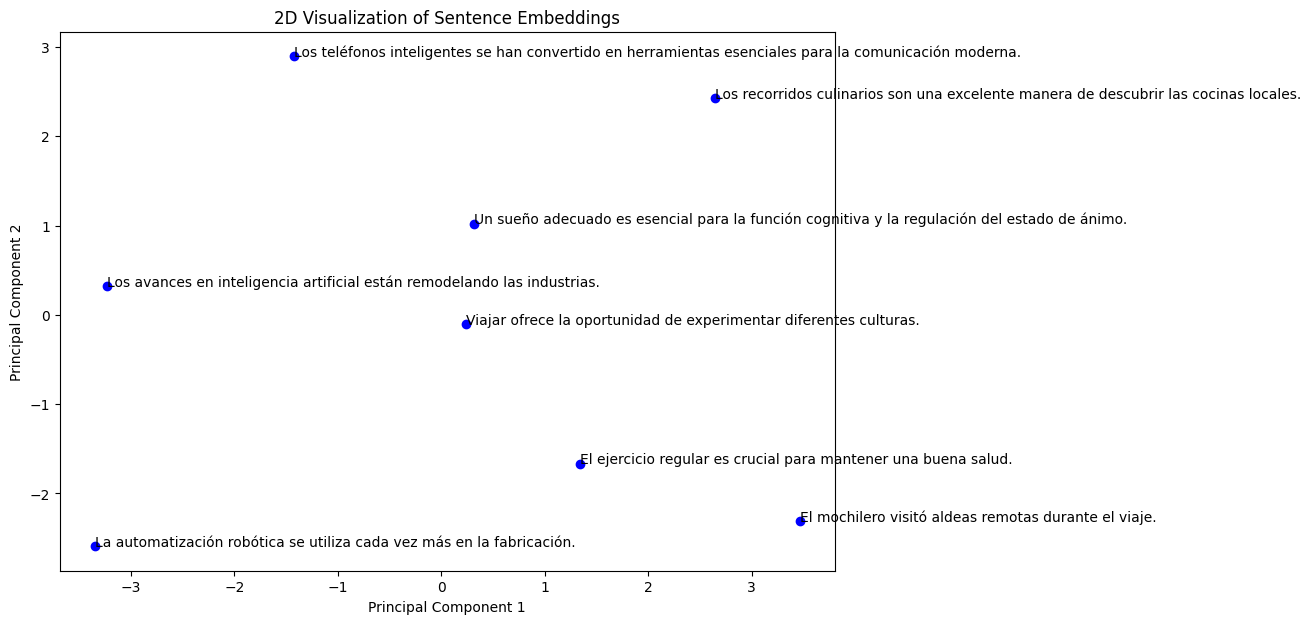

In [ ]:
sentences = [
    "Viajar ofrece la oportunidad de experimentar diferentes culturas.",
    "El mochilero visitó aldeas remotas durante el viaje.",
    "Los recorridos culinarios son una excelente manera de descubrir las cocinas locales.",
    "Los avances en inteligencia artificial están remodelando las industrias.",
    "La automatización robótica se utiliza cada vez más en la fabricación.",
    "Los teléfonos inteligentes se han convertido en herramientas esenciales para la comunicación moderna.",
    "El ejercicio regular es crucial para mantener una buena salud.",
    "Un sueño adecuado es esencial para la función cognitiva y la regulación del estado de ánimo."
]

# Generate embeddings for the sentences
embeddings = np.vstack([get_sentence_embedding(sentence, tokenizer, model, device) for sentence in sentences])

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Plot the embeddings
plt.figure(figsize=(10, 7))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], color='blue')

# Annotate the points with sentences
for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (embeddings_2d[i, 0], embeddings_2d[i, 1]))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Visualization of Sentence Embeddings')
plt.show()
